In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import seaborn as sns

# 1
Utilize o conjunto de dados [Go To College Dataset](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset) ou um conjunto de dados de **classificação supervisionada** de sua escolha.

In [201]:
df_gotocollege = pd.read_csv('GoToCollege.csv')
df = df_gotocollege.copy()
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [202]:
for i in df['type_school']:
    type_school = df['type_school'].replace(['Academic','Vocational'],['0','1'])
    df['type_school'] = type_school

for i in df['school_accreditation']:
    school_accreditation = df['school_accreditation'].replace(['A','B'],['0','1'])
    df['school_accreditation'] = school_accreditation

for i in df['gender']:
    gender = df['gender'].replace(['Male','Female'],['0','1'])
    df['gender'] = gender

for i in  df['interest']:
    interest = df['interest'].replace(['Uncertain','Not Interested','Interested','Less Interested','Very Interested'], ['0', '1', '2', '3','4'])
    df['interest'] = interest

for i in df['residence']:
    residence = df['residence'].replace(['Rural','Urban'], ['0','1'])
    df['residence'] = residence
                                              
df['parent_was_in_college']  = df['parent_was_in_college'].map({True:1, False:0})
df['will_go_to_college']  = df['will_go_to_college'].map({True:1, False:0})

df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,0,3,1,56,6950000,83.0,84.09,0,1
1,0,0,0,3,1,57,4410000,76.8,86.91,0,1
2,0,1,1,4,1,50,6500000,80.6,87.43,0,1
3,1,1,0,4,0,49,6600000,78.2,82.12,1,1
4,0,0,1,4,1,57,5250000,75.1,86.79,0,0


In [203]:
df.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [204]:
#df.will_go_to_college.value_counts()

# 2
Realize a classificação utilizando pelo menos os seguintes métodos:
- kNN
- Decision Trees
- Bayes
- MLP (uma camada oculta)
- MLP (duas camadas ocultas)
- SVM

In [205]:
X = df.drop(columns=['will_go_to_college'])
y = df['will_go_to_college'].values

In [206]:
#knn
knn = KNeighborsClassifier(n_neighbors = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

#arvore de decisao
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
dtc_predict = dtc.predict(X_test)

#naive bayes
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb_predicted = gnb.predict(X_test)

#mlp 1 camada
mlp = MLPClassifier(activation='relu', alpha=1e-05, hidden_layer_sizes = (5,), solver='adam', random_state=1, max_iter=400).fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)

#mlp 2camadas
mlp_2 = MLPClassifier(activation='relu', alpha=1e-05, hidden_layer_sizes = (5,2), solver='adam', random_state=1, max_iter=400).fit(X_train, y_train)
mlp2_predict = mlp_2.predict(X_test)

#SVM
svm = svm.SVC(C=1.0)
svm = svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test);



# 3
Calcule métricas adequadas para o problema e justifique suas escolhas.

In [207]:
df['will_go_to_college'].value_counts()

will_go_to_college
1    500
0    500
Name: count, dtype: int64

In [208]:
#Pela célula acima, vou assumir que os dados são balanceados, então minha métrica escolhida foi a acurácia

#Também escolhi o recall para identificar de todas as condições reais, quanto meu algoritmo acertou.


In [209]:
knn_score = accuracy_score(y_test, knn_predict)
dtc_score = accuracy_score(y_test, dtc_predict)
gnb_score = accuracy_score(y_test, gnb_predicted)
mlp_score = accuracy_score(y_test, mlp_predict)
mlp2_score = accuracy_score(y_test, mlp2_predict)
svm_score = accuracy_score(y_test, svm_predict)

print('Acc KNN:', knn_score,
      '\nAcc Árvore De Decisão:', dtc_score,
      '\nAcc Naive Bayes:', gnb_score,
      '\nAcc MLP Com 1 Camada:', mlp_score,
      '\nAcc MLP 2 Camadas:',mlp2_score,
      '\nAcc SVM:',svm_score)


Acc KNN: 0.7066666666666667 
Acc Árvore De Decisão: 0.86 
Acc Naive Bayes: 0.75 
Acc MLP Com 1 Camada: 0.5 
Acc MLP 2 Camadas: 0.5 
Acc SVM: 0.7233333333333334


In [210]:
recall_KNN = recall_score(y_test, knn_predict)
recall_dtc = recall_score(y_test, dtc_predict)
recall_gnb = recall_score(y_test, gnb_predicted)
recall_mlp = recall_score(y_test, mlp_predict)
recall_mlp2 = recall_score(y_test, mlp2_predict)
recall_svm = recall_score(y_test, svm_predict)

print('Recall KNN:', recall_KNN,
      '\nRecall Árvore De Decisão:', recall_dtc,
      '\nRecall Naive Bayes:', recall_gnb,
      '\nRecall MLP Com 1 Camada:', recall_mlp,
      '\nRecall MLP 2 Camadas:', recall_mlp2,
      '\nRecall SVM:', recall_svm)

Recall KNN: 0.6733333333333333 
Recall Árvore De Decisão: 0.84 
Recall Naive Bayes: 0.74 
Recall MLP Com 1 Camada: 0.0 
Recall MLP 2 Camadas: 0.0 
Recall SVM: 0.7533333333333333


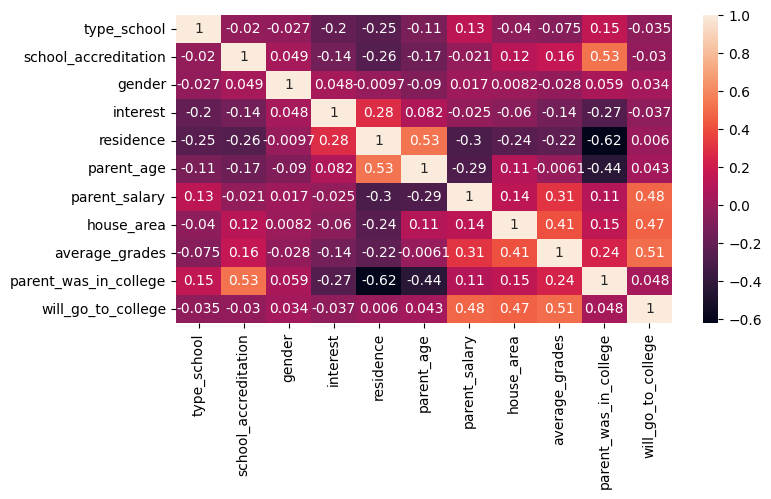

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

# 4
Realize uma otimização dos hiperparâmetros.

In [212]:
#mlp 1 camada
mlp = MLPClassifier(activation='relu', alpha=1, hidden_layer_sizes = (6,), solver='adam', random_state=1, max_iter=1000).fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)

#mlp 2camadas
mlp_2 = MLPClassifier(activation='relu', alpha=1, hidden_layer_sizes = (6,2), solver='adam', random_state=1, max_iter=1000).fit(X_train, y_train)
mlp2_predict = mlp_2.predict(X_test)

#metricas acc e recall MLP (1 e 2 camadas)com hiperparametros otimizados.
mlp_score = accuracy_score(y_test, mlp_predict)
mlp2_score = accuracy_score(y_test, mlp2_predict)

recall_mlp = recall_score(y_test, mlp_predict)
recall_mlp2 = recall_score(y_test, mlp2_predict)

print('ACC MLP 1 camada:', mlp_score,
      '\nACC MLP 2 camadas:', mlp2_score)
print('-----------------------')
print('MLP camada 1 Recall', recall_mlp,
      '\nMLP camada 1 Recall', recall_mlp2)


ACC MLP 1 camada: 0.5 
ACC MLP 2 camadas: 0.5
-----------------------
MLP camada 1 Recall 1.0 
MLP camada 1 Recall 1.0


# 5
Avalie todos os resultados.

Decision Tree Classifier (arvore de decisão) e Naive Bayes foram as que melhor aprenderam. O KNN pode aprender melhor com um outro K diferente do que usei mas com o K escolhido, o desempenho não foi tão bom quanto quanto outros classificadores.
O Multilayer Perceptron MLP não aprendeu bem mesmo modificando os parametros, talvez modificando mais os parametros mas minha otimização deles ainda não o fez aprender ou aprender bem.
O SVM não trouxe um desempenho muito superior, para este estado, aos que escolhi como os que melhor aprenderam.

# Minhas Notas
Acuracia em dados desbalanceados por classe não é uma metrica confiavel.

Assim, será necessario mais metricas, quais metricas? depende do problema.

Algumas outras metricas: precisão, recall e f1-score.

Exemplo1:

Algoritmo que classifique videos adequeados ou não para crianças. Nesse caso, a precisão é uma metricas bem importante, pois é preferivel que o algoritmo classifique um conteudo como "não-infantil" mesmo ele sendo infantil, do que o inverso.


Exemplo2:

Algoritmo que classifica propensão de uma pessoa ter ou não uma doença. Neste caso, não queremos que o algoritmo nos dê falsos negativos, é preferivel que ele classifique como possivel a ocorrencia da doença (falsos posivitivos neste caso é menor ruim, apesar de ser um erro). Assim, o que mais nos interresa é o recall porque queremos diminuir os falsos negativos.



- Vide Matriz De Correlação

In [213]:
#from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#cm = confusion_matrix(y_test, mlp_predict)
#cm_display = ConfusionMatrixDisplay(cm).plot()